# Importance Sampling

## Objetivo

Dada una $p(x)$ queremos poder calcular $\mathbb{E}_p(f(X)) = \int f(x) p(x) dx$

Por ley de los grandes números, dada una muestra $x_1,..., x_n$ con distribución $p$, podemos aproximar la esperanza del siguiente modo:

$$\mathbb{E}_p(f(X)) \simeq \frac{1}{N}\sum_{i=1}^{N}f(x_i)$$


### Obstáculos

* Nuestra $p(x)$ es muy difícil de samplear
* El cálculo empírico tiene mucha varianza


### Solución

Para resolver esto observemos lo siguiente:

$$ \mathbb{E}_p(f(X)) = \int f(x) p(x) dx = \int \frac{f(x) p(x)}{q(x)} q(x) dx = \mathbb{E}_q( \frac{f(x) p(x)}{q(x)} )$$

$$≈ \frac{1}{N} \sum_{i=1}^N f(x_i) \frac{p(x_i)}{q(x_i)}
,$$

donde $x_i$ son sampleos a partir de $q$ y $\frac{p(x_i)}{q(x_i)}$ son los **pesos de importancia**.



Hay que elegir $q(x)$ de modo que la distribución asigne más importancia cuando $p(x)f(x)$ es alto, entonces podemos aproximar esa esperanza calculando la media empírica de $q$ en $\frac{f(x) p(x)}{q(x)}$. De este modo logramos dos cosas:

* Podemos calcular la esperanza a partir de una distribución $q(x)$ más sencilla de samplear.
* Podemos disminuir la varianza de nuestra estimación.

## Paso a Paso del método

 - **Elegir una distribucion propuesta $q(x)$**: Tiene que ser facil de muestrar y tiene que ser grande en zonas de nuestro interés.
 - **Calcular los $x_i$:** Generar $N$ muestras a partir de $q$.
 - **Aproximar $E[f]$:** Calcular $\frac{1}{N} \sum_{i=1}^N f(x_i) \frac{p(x_i)}{q(x_i)}$

# Ejercicio 1

a) Graficar la distribucion $p$ y la función $f$.  
b) Encontrar una $q$ adecuada para nuestro problema  
c) Calcular $E[f(x) \frac{p(x)}{q(x)}]$


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

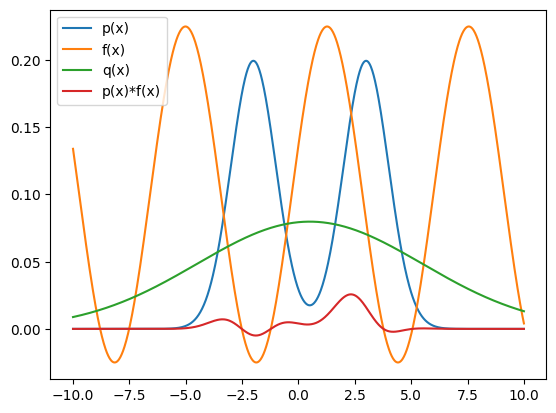

In [4]:
def p(x):
  a,b,c = -2,3,1
  term1 = 0.5 * (1 / np.sqrt(2 * np.pi * c**2)) * np.exp(- (x - a)**2 / (2 * c**2))
  term2 = 0.5 * (1 / np.sqrt(2 * np.pi * c**2)) * np.exp(- (x - b)**2 / (2 * c**2))
  return term1 + term2

def f(x):
  return np.sin(x+0.3)/8+0.1

q = stats.norm(loc=0.5, scale=5)

plt.figure()
x = np.linspace(-10,10,1000)
plt.plot(x, p(x), label='p(x)')
plt.plot(x, f(x), label='f(x)')
plt.plot(x, q.pdf(x), label='q(x)')
plt.plot(x, p(x)*f(x), label='p(x)*f(x)')
plt.legend()
plt.show()






In [5]:
N = 10000
q_samples = q.rvs(N)

esperance = 0
for i in q_samples:
    esperance += f(i) * p(i) /q.pdf(i)

print(esperance/N)


0.056422651349828844


# Ejercicio 2

Ahora conocemos a $p(x)$ y sabemos que es una distribución bimodal.

Calculemos empíricamente $E_p(f(x))$, donde $f(x) = sin(x)$

Para esto tomar una muestra $X = {x_1, x_2, ..., x_N}$ de acuerdo a la distribución $p(x)$

Luego calculamos $\mathbb{E}_p(f(x)) \simeq \frac{1}{N} \sum_{i=1}^N f(x_i)$


Repetir este proceso R = 1000 veces y graficar la distribución de $\mathbb{E}_p(f(x))$

Calcular la varianza de $\mathbb{E}_p(f(x))$

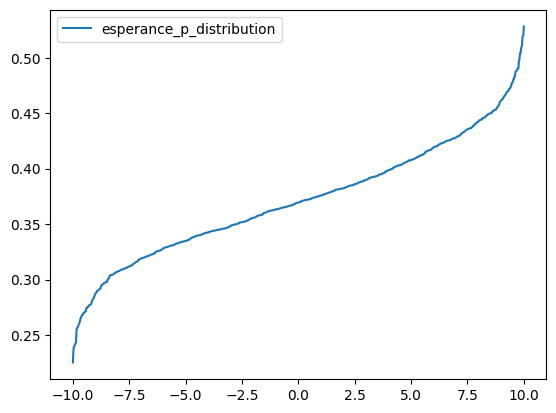

0.002797320574811081


In [14]:
import scipy.stats as stats
#Completar
N = 100
R = 1000

def f(x):
  return np.sin(x)

esperance_p_distribution = []
for i in range(R):
  p_1 = stats.norm(loc=-2, scale=1)
  p_2 = stats.norm(loc=3, scale=1)

  p_1_samples = p_1.rvs(N)
  p_2_samples = p_2.rvs(N)
  p_samples = 0.5 * p_1_samples + 0.5*p_2_samples

  esperance_p = 0
  for i in p_samples:
      esperance_p += f(i)

  esperance_p_distribution.append(esperance_p/N)

x = np.linspace(-10,10, R)
esperance_p_distribution = sorted(esperance_p_distribution)
plt.figure()
plt.plot(x, esperance_p_distribution, label='esperance_p_distribution')
plt.legend()
plt.show()

variance = 0
for i in esperance_p_distribution:
    variance += (i - np.mean(esperance_p_distribution))**2

print(variance/(R-1))




Ahora vamos a calcular la media utilizando Importance Sampling.

Para esto proponer una $q(x)$ adecuada. Pueden graficar $p$ y $f$ para ayudarse en este paso.

Recordemos que

$\mathbb{E}_p(f(x)) = \mathbb{E}_q(\frac{f(x) p(x)}{q(x)}) \simeq \frac{1}{N} \sum_{i=1}^N \frac{f(x) p(x)}{q(x)}$

Repetir el procedimiento R veces y graficar la distribución.

¿Que observa?

¿En que modificó utilizar Importance Sampling?


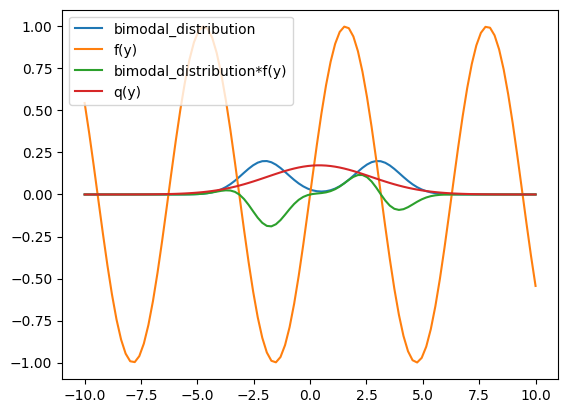

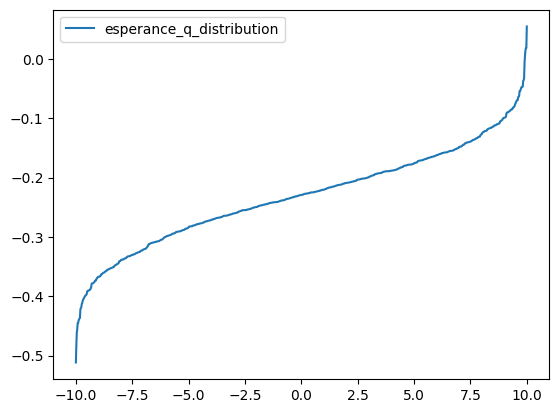

0.00681875112349745


In [13]:
from scipy.stats import norm

def bimodal_distribution(x):
    mu1 = -2
    mu2 = 3
    sigma = 1

    y = 0.5 * (norm.pdf(x, mu1, sigma) + norm.pdf(x, mu2, sigma))
    return y

y = np.linspace(-10, 10, 100)
plt.figure()
plt.plot(y, bimodal_distribution(y), label='bimodal_distribution')
plt.plot(y, f(y), label='f(y)')
plt.plot(y, bimodal_distribution(y)*f(y), label='bimodal_distribution*f(y)')
plt.plot(y, norm.pdf(y, 0.4, 2.3), label='q(y)')
plt.legend()
plt.show()

esperance_q_distribution = []
for i in range(R):
    q = stats.norm(loc=0.4, scale=2.3)
    q_samples = q.rvs(N)
    
    esperance = 0
    for i in q_samples:
        esperance += f(i) * bimodal_distribution(i) /q.pdf(i)
    
    esperance_q_distribution.append(esperance/N)

esperance_q_distribution = sorted(esperance_q_distribution)

plt.figure()
plt.plot(x, esperance_q_distribution, label='esperance_q_distribution')
plt.legend()
plt.show()


variance = 0
for i in esperance_q_distribution:
    variance += (i - np.mean(esperance_q_distribution))**2

print(variance/(R-1))



# Ejercicio 3

Replicar **ej 1** pero usando

* $$p \sim e(1)$$
* $$f(x): I_{x\geq4}(x)$$

Verifique que da lo esperado.